Apply following feature detection techniques:

i) Hough Transform 

ii) Harris and Hessian 

iii) SIFT

iv) SURF

v) HOG


###Hough Transform
The Hough Transform is used to detect lines and other shapes in an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/OIP2.jpg')

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[ 65,  66,  67, ...,  60,  59,  57],
       [ 65,  65,  67, ...,  59,  57,  56],
       [ 65,  65,  67, ...,  59,  57,  55],
       ...,
       [129, 133, 133, ..., 142, 142, 143],
       [126, 130, 130, ..., 140, 140, 140],
       [128, 132, 132, ..., 140, 140, 140]], dtype=uint8)

In [4]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [5]:
# Apply Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)
lines


array([[[  4, 143, 283, 138]],

       [[  0, 139, 279, 153]]], dtype=int32)

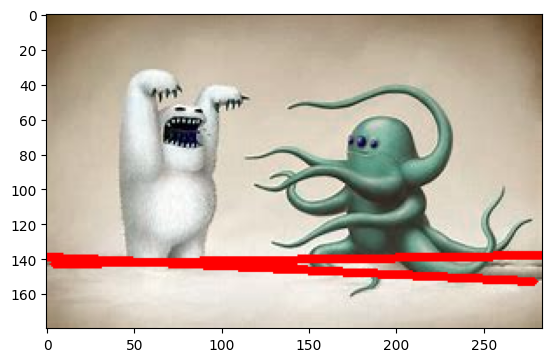

In [6]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255,0,0), 3)

plt.imshow(img)

###Harris and Hessian

Harris and Hessian feature detection algorithms are used to detect corners and keypoints in an image

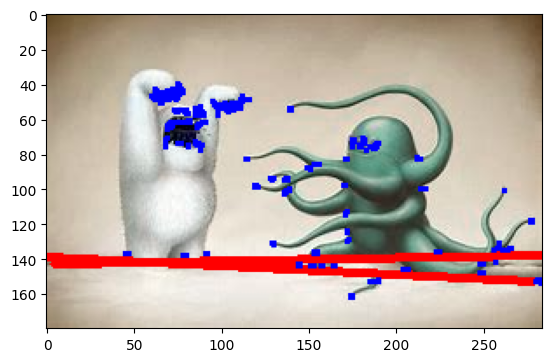

In [7]:
operatedImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
operatedImage =np.float32(operatedImage)

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)

img[dest > 0.01 * dest.max()] = [0, 0, 255]
plt.imshow(img)

Here's an example of how to use Hessian keypoint detection:

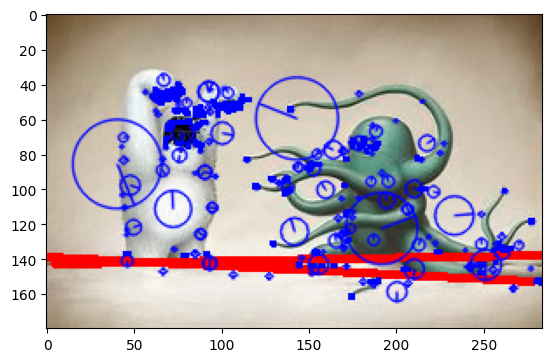

In [8]:
# Create Hessian detector object
detector = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = detector.detectAndCompute(img, None)

# Draw detected keypoints on original image
img = cv2.drawKeypoints(img, keypoints, None, (0, 0, 255), 4)

# Display image with detected keypoints
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


###SIFT
SIFT (Scale-Invariant Feature Transform) is used to detect keypoints in an image that are invariant to scale and rotation

In [9]:
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

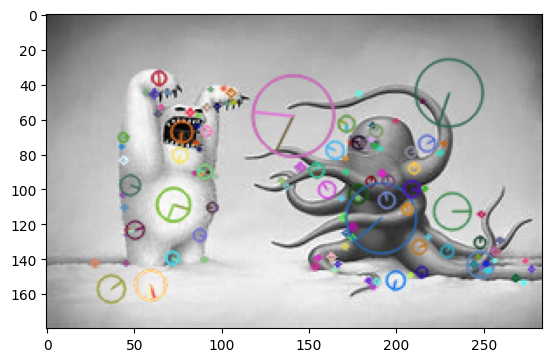

In [11]:
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

###SURF
SURF is a feature detection algorithm that detects and describes keypoints in an image

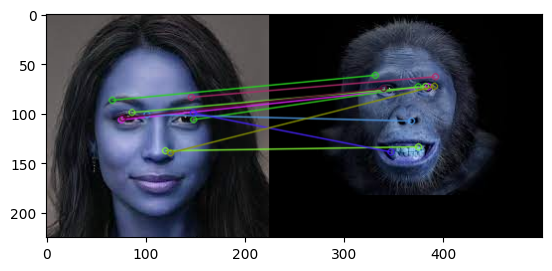

In [13]:
img1 = cv2.imread("/content/download.jpg")
img2 = cv2.imread("/content/download1.jpg")

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(img3) 
plt.show()

###HOG
HOG is a feature descriptor that counts the occurrences of gradient orientation in localized portions of an image

In [17]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

(512, 256, 3)


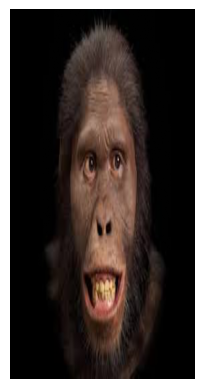

In [19]:
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

<ipython-input-30-73e4091c02d2>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


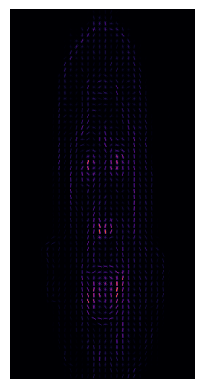

In [30]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="inferno")

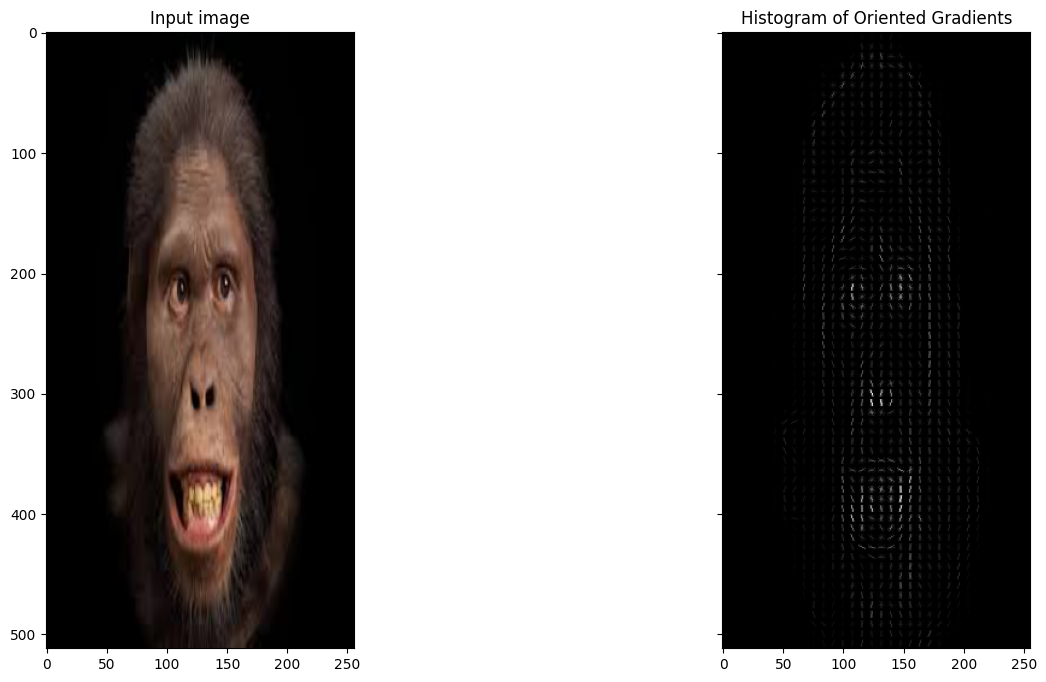

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey= True)
ax1.imshow(resized_img, cmap= plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()